In [ ]:
import yaml
with open("sources.yml", 'r') as f:
    yaml_data = yaml.load(f, Loader=yaml.FullLoader)

print(yaml_data["airports"])



In [ ]:
def create_data_list(source_file):
    with open(source_file, 'r') as f:
        yaml_data = yaml.safe_load(f)
    
    return(yaml_data)


yaml_data = create_data_list("sources.yml")

In [ ]:
from src.create_data_list import create_data_list
urls = create_data_list("sources.yml")

In [ ]:
import pandas as pd

data = pd.read_csv(
    yaml_data["airports"][2018], 
    delimiter = ';',
    dtype = {
        "ANMOIS": "str",  
        "APT": "str",     
        "APT_NOM": "str", 
        "APT_ZON": "str",
    }
)

data["an"] = data["ANMOIS"].str.slice(stop=4)
data["mois"] = data["ANMOIS"].str.slice(start=4).str.replace('^0', '', regex=True)
data.head()

In [ ]:
def clean_dataframe(df):
    df["an"]   = df["ANMOIS"].str.slice(stop=4)
    df["mois"] = df["ANMOIS"].str.slice(start=4).str.replace('^0', '', regex=True)

    df.columns = [x.lower() for x in df.columns]

    return(df)

In [ ]:
def import_airport_data(list_files):
    
    data = pd.concat([
        pd.read_csv(
            file, 
            delimiter = ';',
            dtype = {
                "ANMOIS":  "str",  
                "APT":     "str",     
                "APT_NOM": "str", 
                "APT_ZON": "str",
            }
        )
        for file in list_files])


    data_final = clean_dataframe(data)

    return(data_final)

pax_apt_all = import_airport_data(list(yaml_data["airports"].values()))
pax_apt_all.head()


# Partie 3

In [ ]:
import geopandas as gpd

In [ ]:
airports_location = gpd.read_file(urls['geojson']['airport'])

In [ ]:
 airports_location.geometry.crs 

In [ ]:
import folium 
m = folium.Map()

folium.GeoJson(airports_location).add_to(m)
m

In [ ]:
import requests

m = folium.Map(tiles="cartodbpositron")

geojson_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json"
).json()

folium.GeoJson(geojson_data, name="hello world").add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
import src.import_data as sid

In [ ]:
# Exercice 3
liste_aeroports = pax_apt_all['apt'].unique()
default_airport = liste_aeroports[0]
default_airport

In [ ]:
pax_apt_all = import_airport_data(list(yaml_data["airports"].values()))

pax_apt_all.loc[:, "trafic"] = pax_apt_all["apt_pax_dep"] + pax_apt_all["apt_pax_tr"] + pax_apt_all["apt_pax_arr"]

pax_apt_all2 = pax_apt_all.query("apt == @default_airport")

pax_apt_all2.loc[:, "date"] = pd.to_datetime(dict(year=pax_apt_all2.an, month=pax_apt_all2.mois, day = 1))
pax_apt_all2

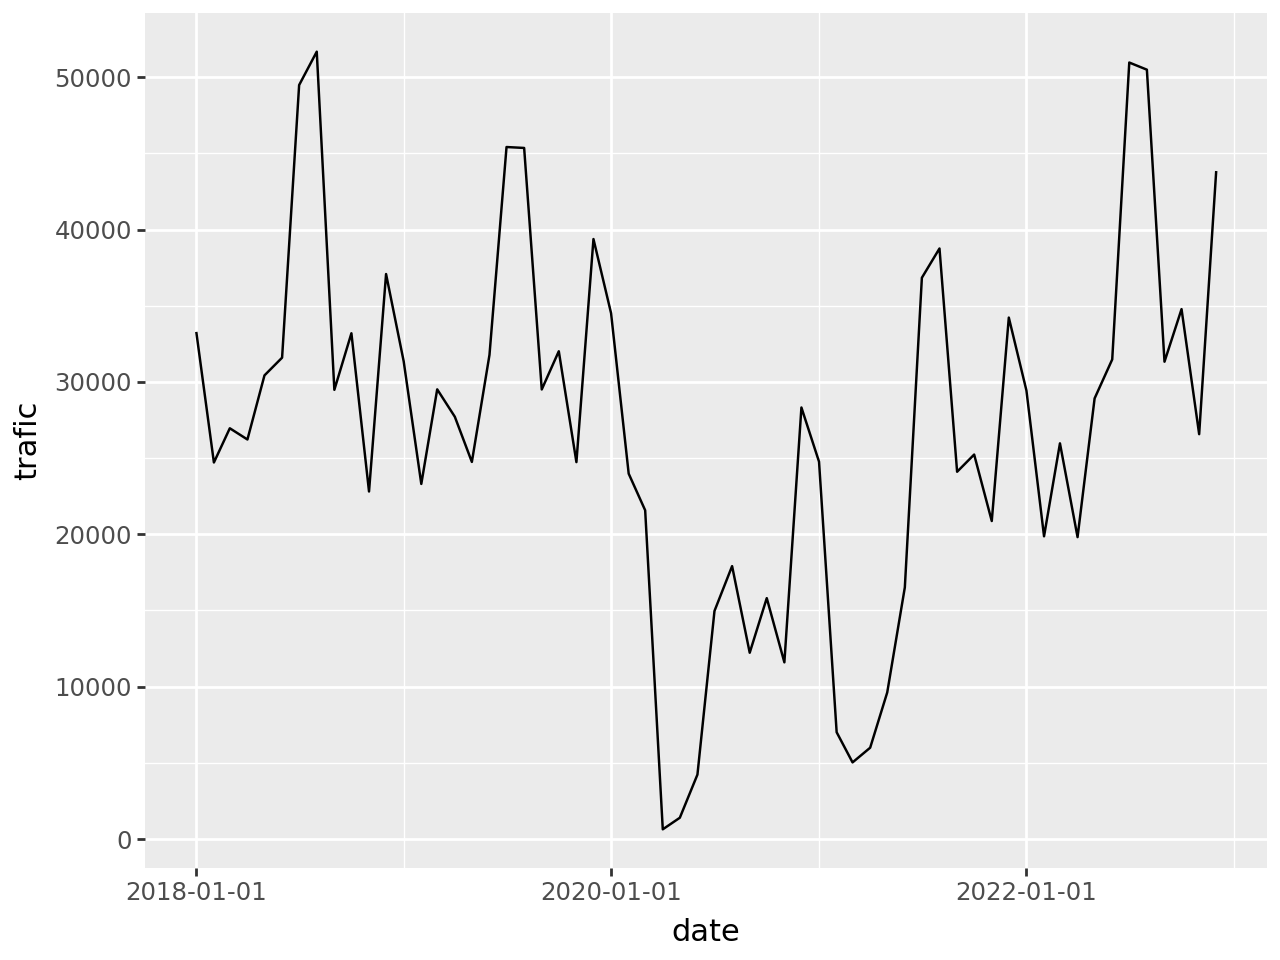

In [37]:
import plotnine as p9

(
    p9.ggplot(pax_apt_all2, p9.aes("date", "trafic"))
    + p9.geom_line()
)


In [42]:
import plotly.express as px

figure_plotly = px.line(
  pax_apt_all2, x="date", y="trafic",
  text="apt_nom"
)
figure_plotly.update_traces(
  mode="markers+lines", type = "scatter",
  hovertemplate="<i>Aéroport:</i> %{text}<br>Trafic: %{y}"
)